# EMAIL SPAM CLASSIFIER

# PROBLEM STATEMENT:

The main goal of these Project is to show how to  design a spam filtering system from scratch.

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\Praveen kumar\Downloads\Spam-Project\Spam Project\Spam Data\spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop("Unnamed: 3",axis=1,inplace=True)
df.drop("Unnamed: 4",axis=1,inplace=True)

In [5]:
df

,v1,v2,Unnamed: 2
0,ham,"Go until jurong point, crazy.. Available only ...",NaN
1,ham,Ok lar... Joking wif u oni...,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN
3,ham,U dun say so early hor... U c already then say...,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN


In [6]:
df= df.rename(columns={'Unnamed: 2':'Label'})

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
df ['Label'] = le.fit_transform(df ['Label'])

In [10]:
df

,v1,v2,Label
0,ham,"Go until jurong point, crazy.. Available only ...",43
1,ham,Ok lar... Joking wif u oni...,43
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,43
3,ham,U dun say so early hor... U c already then say...,43
4,ham,"Nah I don't think he goes to usf, he lives aro...",43
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,43
5568,ham,Will Ì_ b going to esplanade fr home?,43
5569,ham,"Pity, * was in mood for that. So...any other s...",43
5570,ham,The guy did some bitching but I acted like i'd...,43


In [11]:
print('shape = >',df.shape)

shape = > (5572, 3)


In [12]:
print('ham and spam counts','\n',df.v1.value_counts())

ham and spam counts 
 ham     4825
spam     747
Name: v1, dtype: int64


In [20]:
#exploring categorical columns
for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*******************************************************************************************************')
        print('\n')

v1 : ['ham' 'spam']
ham     4825
spam     747
Name: v1, dtype: int64
*******************************************************************************************************


v2 : ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                   

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
 2   Label   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [15]:
df.isnull().sum()

v1       0
v2       0
Label    0
dtype: int64

<AxesSubplot:>

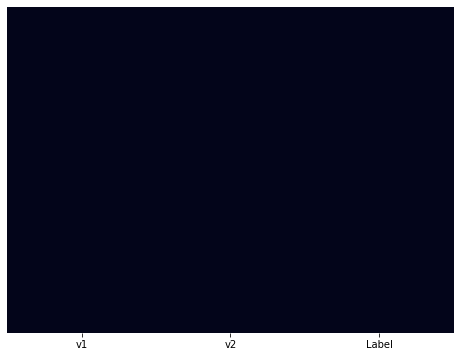

In [16]:
#Visualizing missing values through heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [17]:
#dropping rows with missing values
df=df.dropna()

In [18]:
df['length']=df.v2.str.len()

In [19]:
df['sub_length']=df.v1.str.len()
df.head()

,v1,v2,Label,length,sub_length
0,ham,"Go until jurong point, crazy.. Available only ...",43,111,3
1,ham,Ok lar... Joking wif u oni...,43,29,3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,43,155,4
3,ham,U dun say so early hor... U c already then say...,43,49,3
4,ham,"Nah I don't think he goes to usf, he lives aro...",43,61,3


In [20]:
df['v2']=df['v2'].str.lower()

In [21]:
df['v1']=df['v1'].str.lower()

In [22]:
df.tail()

,v1,v2,Label,length,sub_length
5567,spam,this is the 2nd time we have tried 2 contact u...,43,161,4
5568,ham,will ì_ b going to esplanade fr home?,43,37,3
5569,ham,"pity, * was in mood for that. so...any other s...",43,57,3
5570,ham,the guy did some bitching but i acted like i'd...,43,125,3
5571,ham,rofl. its true to its name,43,26,3


In [23]:
df['v2']=df['v2'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

df['v2']=df['v2'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

df['v2']=df['v2'].str.replace(r'£|\$', 'dollers')

df['v2']=df['v2'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

df['v2']=df['v2'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [24]:
#remove punctuation
df['v2']=df['v2'].str.replace(r'[^\w\d\s]', ' ')

#replace whitespace between terms with a single space
df['v2']=df['v2'].str.replace(r'\s+', ' ')

#Remove leading and trailing whitespace
df['v2']=df['v2'].str.replace(r'^\s+|\s+?$', '')

In [25]:
df.head()

,v1,v2,Label,length,sub_length
0,ham,go until jurong point crazy available only in ...,43,111,3
1,ham,ok lar joking wif u oni,43,29,3
2,spam,free entry in numbr a wkly comp to win fa cup ...,43,155,4
3,ham,u dun say so early hor u c already then say,43,49,3
4,ham,nah i don t think he goes to usf he lives arou...,43,61,3


In [26]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['v2'] = df['v2'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [27]:
df['clean_length'] = df.v2.str.len()

In [28]:
stop_words = set(stopwords.words('english') + ['u', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['v1'] = df['v1'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [29]:
df['clean_sublength'] = df.v1.str.len()
df.head()

,v1,v2,Label,length,sub_length,clean_length,clean_sublength
0,ham,go jurong point crazy available bugis n great ...,43,111,3,82,3
1,ham,ok lar joking wif oni,43,29,3,21,3
2,spam,free entry numbr wkly comp win fa cup final tk...,43,155,4,139,4
3,ham,dun say early hor c already say,43,49,3,31,3
4,ham,nah think goes usf lives around though,43,61,3,38,3


In [30]:
print('clean message length', df.clean_length.sum())
print('clean subject length', df.clean_sublength.sum())
print('original message length', df.length.sum())
print('original subject length', df.sub_length.sum())

clean message length 300564
clean subject length 17463
original message length 446422
original subject length 17463


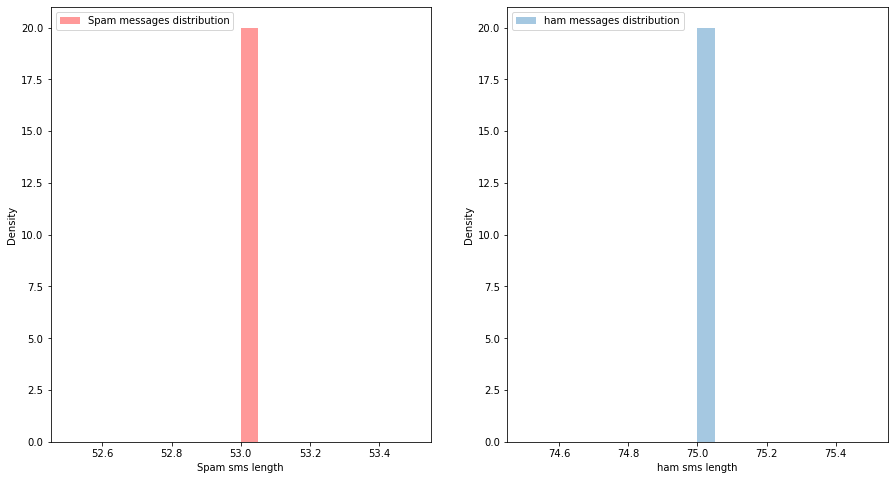

In [31]:
#message distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['Label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['Label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

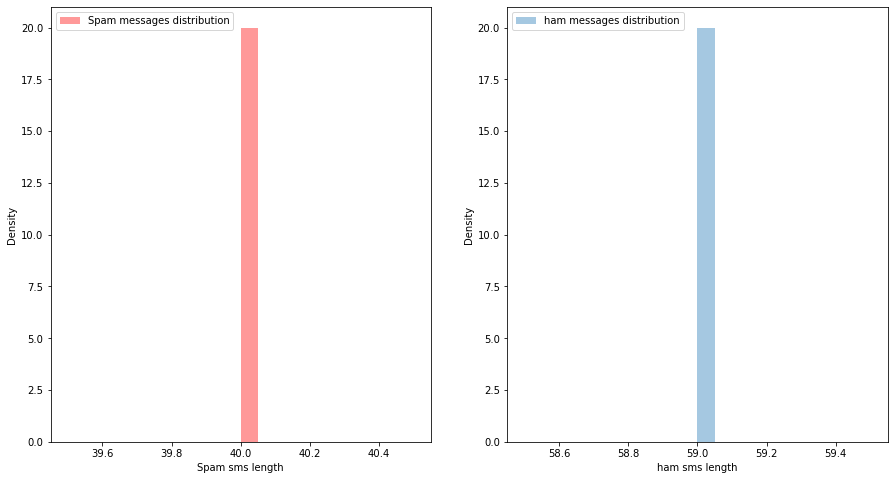

In [32]:
#message distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['Label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['Label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()
f.savefig('sms distribution')

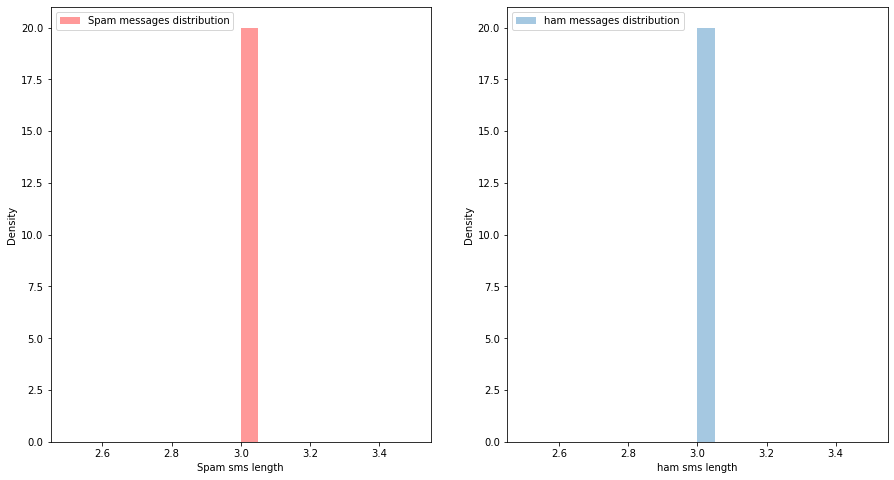

In [42]:
#subject distribution before cleaning

f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['Label']==1]['sub_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['Label']==0]['sub_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

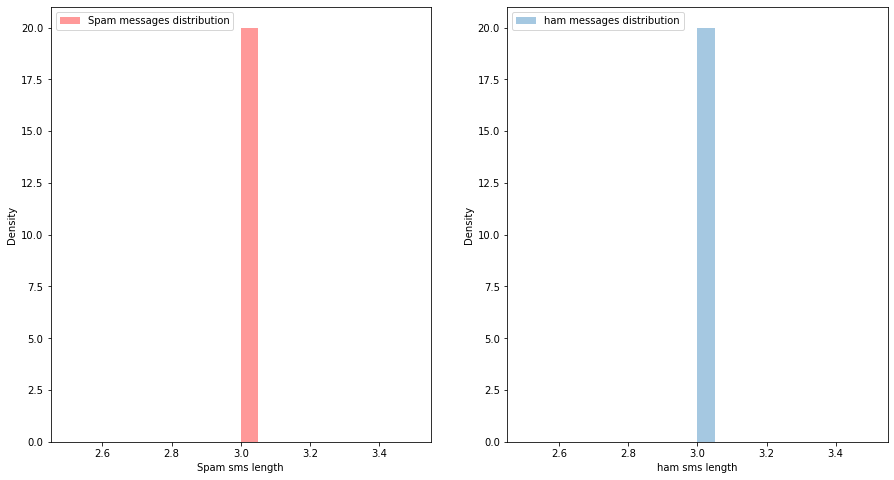

In [33]:
#subject distribution after cleaning

f,ax = plt.subplots(1,2,figsize=(15,8))

sns.distplot(df[df['Label']==1]['clean_sublength'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(df[df['Label']==0]['clean_sublength'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()
f.savefig('subject distribution')

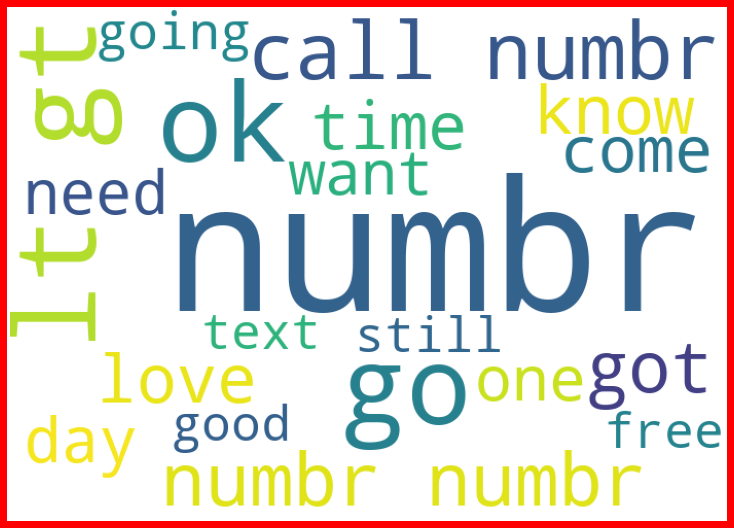

In [34]:
#getting sense of message Loud words in spam
from wordcloud import WordCloud

spams=df['v2']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

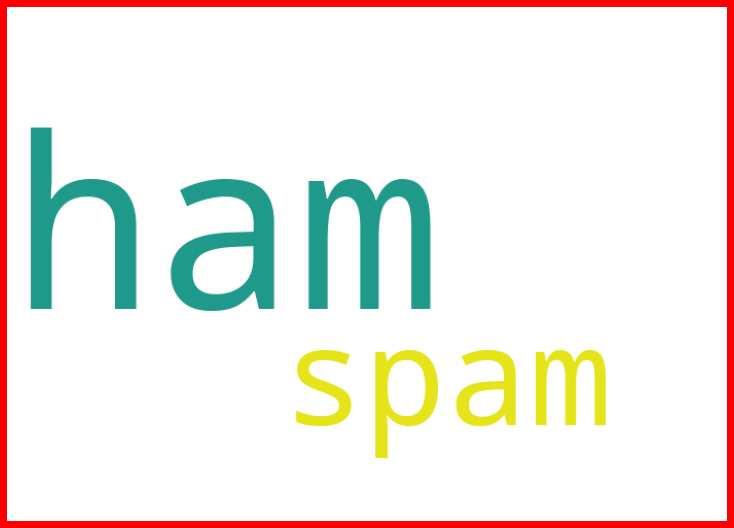

In [35]:
#getting sense of subject Loud words in spam
from wordcloud import WordCloud

spams=df['v1']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

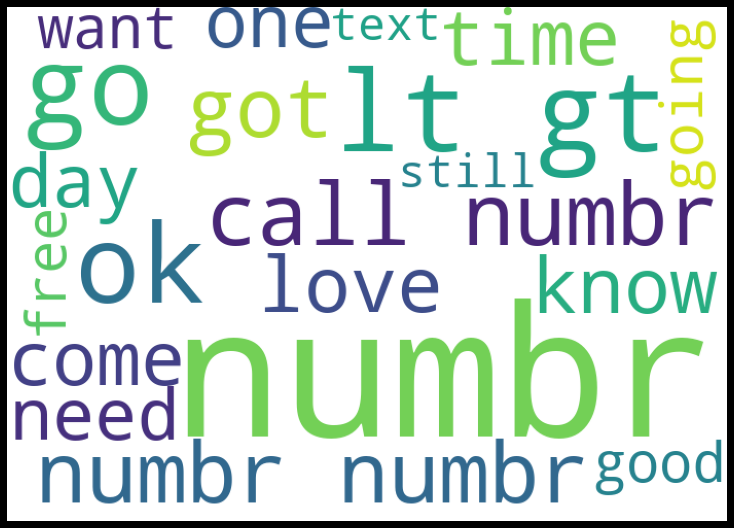

In [36]:
#getting sense of message Loud words in ham

spams=df['v2']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

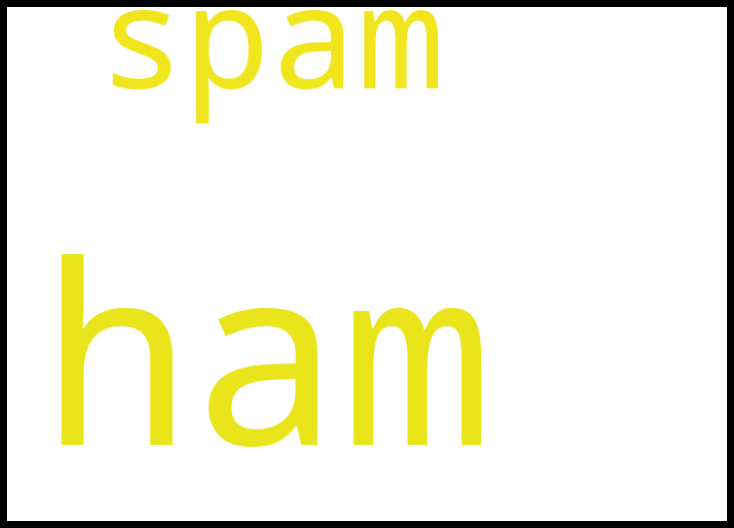

In [45]:
#getting sense of subject Loud words in ham

spams=df['v1']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec=TfidfVectorizer()
feature1=tf_vec.fit_transform(df['v2'],df['v1'])

In [38]:
x=feature1

In [39]:
y=df['Label']

In [40]:
#splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=9)

In [41]:
pip install xgboost

In [42]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [43]:
KNN=KNeighborsClassifier(n_neighbors=6)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()


In [44]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))

observation:we can conclude that RandomForest Classifier as our best fitting model which is giving very less difference compare to other models

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.9928251121076234


Cross_Val_Score =  0.9910265567588785


roc_auc_score =  nan


classification_report
               precision    recall  f1-score   support

          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          43       0.99      1.00      1.00      1107

    accuracy                           0.99      1115
   macro avg       0.11      0.11      0.11      1115
weighted avg       0.99      0.99      0.99      1115



[[   0 

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37], got [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 30 31 32 34 37 38 39 40 41 43]

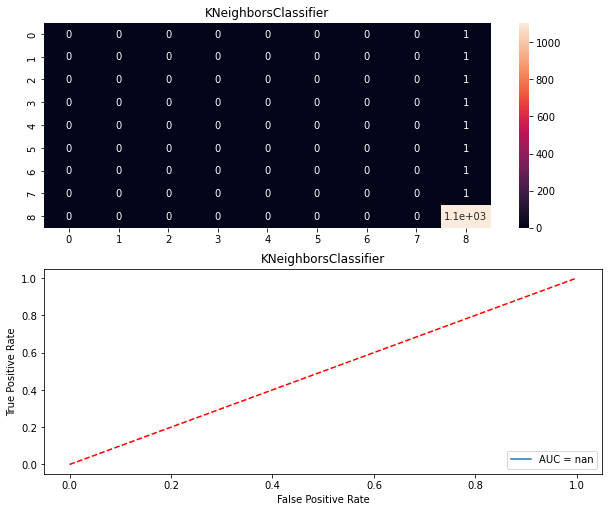

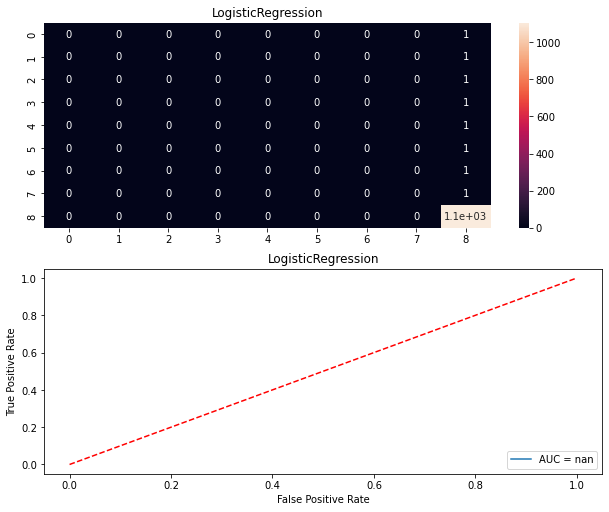

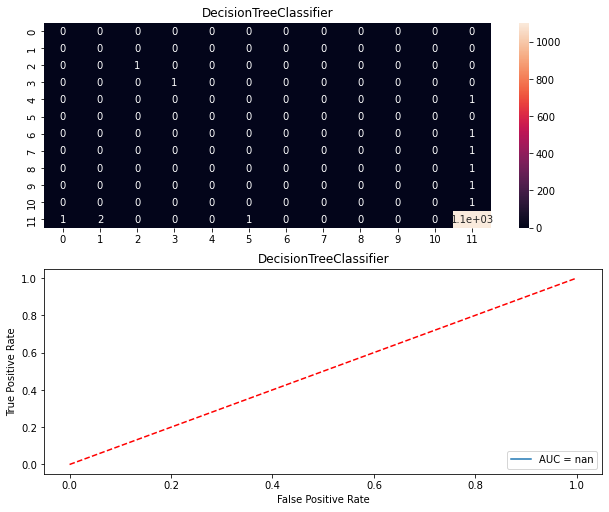

In [77]:
Model= []
score= []
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre, pos_label=1)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

# Checking the Cross Validation Score

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC ,x,y,cv=5).mean())
# cv score for Random Forest Classifier
print(cross_val_score(RFC ,x,y,cv=5).mean())
# cv score for Logistic Regression
print(cross_val_score(LR ,x,y,cv=5).mean())
# cv score for KNN Classifier
print(cross_val_score(knn ,x,y,cv=5).mean())

0.9899500044279492
0.9930011029618955
0.991026559644476
0.991026559644476


# Hyper Parameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
# Decision Tree Classifier

parameters = {'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[10,20,30,40,50],
             'splitter':['best','random']}

In [83]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [84]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'log2',
 'splitter': 'best'}

In [85]:
ESC = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',splitter='best')
ESC.fit(x_train,y_train)
pred = ESC.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

99.19282511210761


So here we can see the accuracy of the best model is increased after tuning.

# Saving The Model

In [86]:
#saving our model

import joblib
joblib.dump(MNB,'DTC_Spam_classification.csv')

['DTC_Spam_classification.csv']

In [87]:
model=joblib.load('DTC_Spam_classification.csv')

In [94]:
#Testing our model
import sys
nums= model.fit(x_test,y_test)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

MultinomialNB()


In [95]:
# prediction
prediction= model.predict(x_test)
prediction

array([43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43,
       43, 43, 43, 43, 43